In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import linear_model

Interación 0:
Cantidad de neuronas: 20. Cantidad de patrones: 13.
Cantidad de neuronas: 40. Cantidad de patrones: 23.
Cantidad de neuronas: 60. Cantidad de patrones: 38.
Cantidad de neuronas: 80. Cantidad de patrones: 49.
Cantidad de neuronas: 100. Cantidad de patrones: 62.
Cantidad de neuronas: 120. Cantidad de patrones: 75.
Cantidad de neuronas: 140. Cantidad de patrones: 86.
Cantidad de neuronas: 160. Cantidad de patrones: 98.
Cantidad de neuronas: 180. Cantidad de patrones: 110.
Cantidad de neuronas: 200. Cantidad de patrones: 122.
Cantidad de neuronas: 220. Cantidad de patrones: 136.
Cantidad de neuronas: 240. Cantidad de patrones: 148.
Cantidad de neuronas: 260. Cantidad de patrones: 162.
Cantidad de neuronas: 280. Cantidad de patrones: 171.
Cantidad de neuronas: 300. Cantidad de patrones: 182.
Cantidad de neuronas: 320. Cantidad de patrones: 194.
Cantidad de neuronas: 340. Cantidad de patrones: 207.
Cantidad de neuronas: 360. Cantidad de patrones: 220.
Cantidad de neuronas: 380.

Cantidad de neuronas: 120. Cantidad de patrones: 74.
Cantidad de neuronas: 140. Cantidad de patrones: 88.
Cantidad de neuronas: 160. Cantidad de patrones: 98.
Cantidad de neuronas: 180. Cantidad de patrones: 111.
Cantidad de neuronas: 200. Cantidad de patrones: 123.
Cantidad de neuronas: 220. Cantidad de patrones: 134.
Cantidad de neuronas: 240. Cantidad de patrones: 147.
Cantidad de neuronas: 260. Cantidad de patrones: 161.
Cantidad de neuronas: 280. Cantidad de patrones: 173.
Cantidad de neuronas: 300. Cantidad de patrones: 183.
Cantidad de neuronas: 320. Cantidad de patrones: 194.
Cantidad de neuronas: 340. Cantidad de patrones: 208.
Cantidad de neuronas: 360. Cantidad de patrones: 221.
Cantidad de neuronas: 380. Cantidad de patrones: 233.
Cantidad de neuronas: 400. Cantidad de patrones: 242.
Cantidad de neuronas: 420. Cantidad de patrones: 255.
Cantidad de neuronas: 440. Cantidad de patrones: 269.
Cantidad de neuronas: 460. Cantidad de patrones: 279.
Cantidad de neuronas: 480. Cant

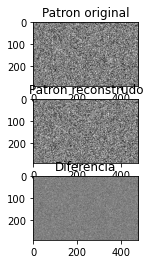

In [24]:
i = 4
capacidad = []
iteraciones = 10
n_neu = np.arange(20, 500, 20).reshape(-1,1)
p_max = np.zeros([n_neu.shape[0], iteraciones])
p_error = np.array([0.001, 0.0036, 0.01, 0.05, 0.1])
    
for k in range(iteraciones):
    print("Interación {}:".format(k))
    for index, N in enumerate(n_neu[:,0]):
        error = 0
        P = 1
        while error<p_error[i]:
            # genero patrones aleatorios
            patrones = np.random.choice([1, -1], size=[P,N])
            # genero la matriz de pesos
            w = np.zeros((N, N))
            for p in range(P):
                w += np.dot(patrones[p].reshape(-1,1),np.transpose(patrones[p].reshape(-1,1)))
            np.fill_diagonal(w,0)
            w /= N
            #reconstruyo el estado
            recontruido = np.sign(np.dot(patrones,w))
            error = np.count_nonzero(recontruido - patrones)/ (N*P)
            P = P+1
            #print("Error con {} neuronas y {} patrones: {}".format(N, P, error))
        print("Cantidad de neuronas: {}. Cantidad de patrones: {}.".format(N, P))
        p_max[index,k] = P
    regr = linear_model.LinearRegression()
    regr.fit(n_neu, p_max[:,k])
    capacidad.append(regr.coef_)
    print("Capacidad = {}\n".format(capacidad[-1]))

plt.subplot(3, 1, 1)
plt.imshow(recontruido, cmap='gray')
plt.title("Patron original")
plt.subplot(3, 1, 2)
plt.imshow(patrones, cmap='gray')
plt.title("Patron reconstrudo")
plt.subplot(3, 1, 3)
plt.imshow(recontruido - patrones, cmap='gray')
plt.title("Diferencia")

plt.show()

Para una Perror = 0.1. El valor medio de la capacidad es 0.6085326086956521 con una varianza de 0.00312809770852866.


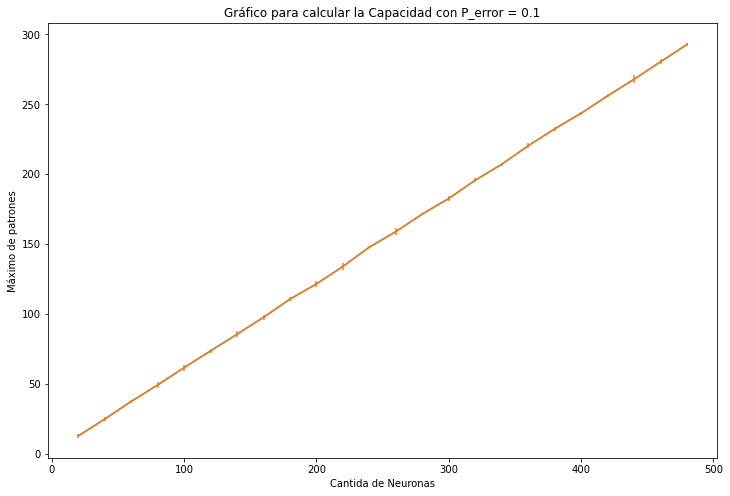

In [25]:
p_max_mean = np.mean(p_max, axis=1)
p_max_var = np.sqrt(np.var(p_max, axis=1))
cap_mean = np.mean(capacidad)
cap_var = np.sqrt(np.var(capacidad))

print("Para una Perror = {}. El valor medio de la capacidad es {} con una varianza de {}.".format(p_error[i],cap_mean, cap_var))

fig = plt.figure(figsize = (12, 8))
plt.plot(n_neu, p_max_mean)
plt.errorbar(n_neu, p_max_mean, p_max_var)
plt.title("Gráfico para calcular la Capacidad con P_error = {}".format(p_error[i]))
plt.ylabel("Máximo de patrones")
plt.xlabel("Cantida de Neuronas")
plt.show()